## Movie Recommendation system

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [65]:
#load data
movie_df = pd.read_csv('data/1950-2019/bollywood_full_1950-2019.csv')
movie_df.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [66]:
movie_df.shape

(4330, 18)

In [87]:
movie_df.columns

Index(['imdb_id', 'poster_path', 'wiki_link', 'original_title', 'is_adult',
       'year_of_release', 'runtime', 'genres', 'imdb_rating', 'imdb_votes',
       'story', 'summary', 'actors', 'release_date', 'actor1', 'actor2',
       'actor3'],
      dtype='object')

<AxesSubplot:>

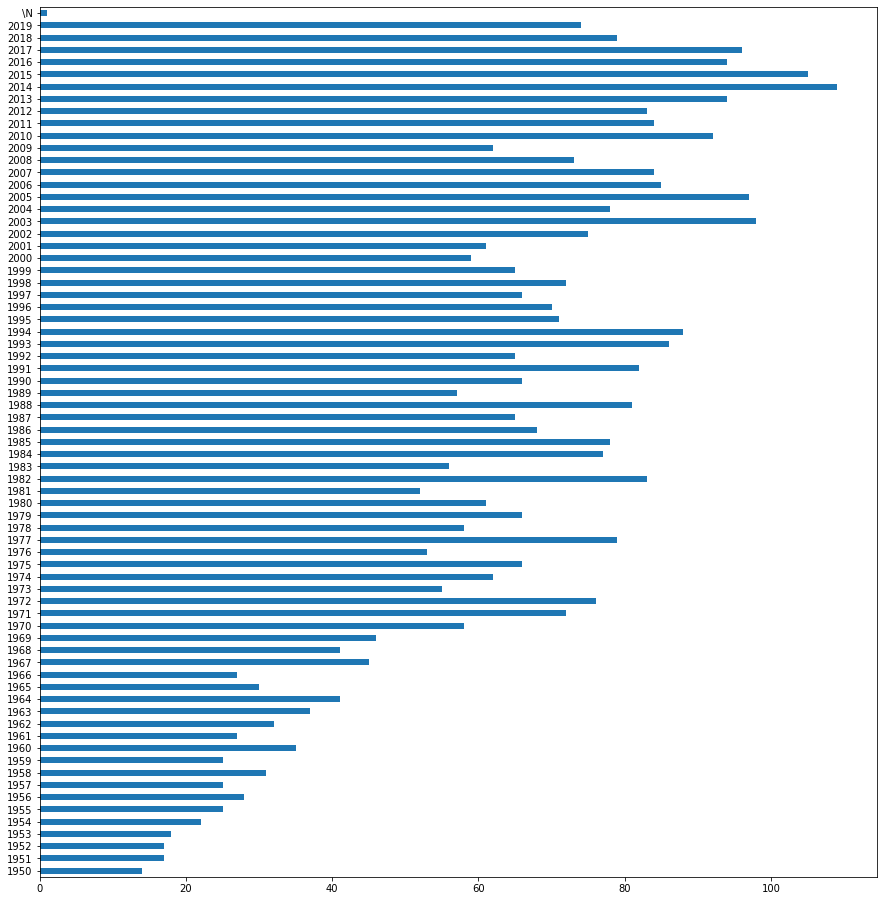

In [86]:
movie_df.year_of_release.value_counts().sort_index().plot(kind='barh', figsize=(15,16))

In [67]:
movie_df.isnull().sum()

title_x                0
imdb_id                0
poster_path          750
wiki_link              0
title_y                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating           13
imdb_votes            13
story                265
summary                1
tagline             3645
actors                10
wins_nominations    2986
release_date        1281
dtype: int64

In [68]:
movie_df = movie_df.drop(['title_x', 'title_y', 'tagline','wins_nominations'], axis=1)

In [69]:
movie_df = movie_df[movie_df['actors'].notnull()]

In [70]:
movie_df.tail()

,imdb_id,poster_path,wiki_link,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date
4324,tt0141441,https://upload.wikimedia.org/wikipedia/en/c/cc...,https://en.wikipedia.org/wiki/Jogan_(film),Jogan,0,1950,116,Drama|Musical|Romance,7.3,59.0,Orphaned at a young age Vijay lives with his ...,An atheist falls in love with a married devout...,Nargis|Dilip Kumar|Pratima Devi|Purnima|Tabass...,NaN
4325,tt0268614,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Samadhi_(1950_film),Samadhi,0,1950,165,Drama,6.1,21.0,The story is based on the true incident at INA...,The story is based on the true incident at INA...,Ashok Kumar|Nalini Jaywant|Kuldip Kaur|Shyam|M...,NaN
4326,tt0244182,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sangram_(1950_film),Sangram,0,1950,139,Drama,6.2,20.0,After the death of his wife a policeman fails...,After the death of his wife a policeman fails...,Ashok Kumar|Nalini Jaywant|Nawab|Sajjan|Tiwari...,NaN
4327,tt0269826,NaN,https://en.wikipedia.org/wiki/Sargam_(1950_film),Sargam,0,1950,135,Drama|Family,6.8,21.0,NaN,Add a Plot »,Raj Kapoor|Rehana|Om Prakash|David Abraham|Rad...,4 February 1957 (Iran)
4328,tt0243555,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sheesh_Mahal_(19...,Sheesh Mahal,0,1950,144,Drama,7.0,13.0,Thakur Jaspal Singh lives in the prestigious a...,Thakur Jaspal Singh lives in the prestigious a...,Sohrab Modi|Naseem Banu|Pushpa Hans|Nigar Sult...,NaN


In [73]:
movie_df.loc[0]['actors']

'Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Gautam|Kirti Kulhari|Rajit Kapoor|Ivan Rodrigues|Manasi Parekh|Swaroop Sampat|Riva Arora|Yogesh Soman|Fareed Ahmed|Akashdeep Arora|Kallol Banerjee|'

In [74]:
movie_df['actor1'] = movie_df['actors'].apply(lambda x: str(x).split('|')[0])

In [77]:
movie_df['actor2'] = movie_df['actors'].apply(lambda x: str(x).split('|')[1] if len(str(x).split('|')) >1 else 'unknown')

In [79]:
movie_df['actor3'] = movie_df['actors'].apply(lambda x: str(x).split('|')[2] if len(str(x).split('|')) >2 else 'unknown')

In [89]:
movie_df['genres'] = movie_df['genres'].str.replace('|', ' ')

In [90]:
movie_df.head()

,imdb_id,poster_path,wiki_link,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,actor1,actor2,actor3
0,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,0,2019,138,Action Drama War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,11 January 2019 (USA),Vicky Kaushal,Paresh Rawal,Mohit Raina
1,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,11 January 2019 (India),Vicky Ahuja,Shoaib Ibrahim,Shrikant Kamat
2,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,0,2019,112,Biography Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,11 January 2019 (USA),Anupam Kher,Akshaye Khanna,Aahana Kumra
3,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,0,2019,121,Crime Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,18 January 2019 (USA),Emraan Hashmi,Shreya Dhanwanthary,Snighdadeep Chatterji
4,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,11 January 2019 (India),Mona Ambegaonkar,Ananth Narayan Mahadevan,Devansh Doshi


In [92]:
movie_df['original_title'][0]

'Uri: The Surgical Strike'

In [93]:
movie_df = movie_df.rename(columns = {'original_title' : 'title'})
movie_df['title'] = movie_df['title'].str.lower()

In [95]:
movie_df['title'][0]

'uri: the surgical strike'

In [96]:
movie_df['comb']=movie_df['actor1']+' '+movie_df['actor2']+' '+movie_df['actor3']+' '+movie_df['genres'] 

In [98]:
movie_df['comb'].head()

0    Vicky Kaushal Paresh Rawal Mohit Raina Action ...
1        Vicky Ahuja Shoaib Ibrahim Shrikant Kamat War
2    Anupam Kher Akshaye Khanna Aahana Kumra Biogra...
3    Emraan Hashmi Shreya Dhanwanthary Snighdadeep ...
4    Mona Ambegaonkar Ananth Narayan Mahadevan Deva...
Name: comb, dtype: object

In [100]:
movie_df.to_csv('movie_data.csv', index=False)

In [2]:
movie = pd.read_csv('movie_data.csv')
movie.head()

,imdb_id,poster_path,wiki_link,title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,actors,release_date,actor1,actor2,actor3,comb
0,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,uri: the surgical strike,0,2019,138,Action Drama War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,11 January 2019 (USA),Vicky Kaushal,Paresh Rawal,Mohit Raina,Vicky Kaushal Paresh Rawal Mohit Raina Action ...
1,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,11 January 2019 (India),Vicky Ahuja,Shoaib Ibrahim,Shrikant Kamat,Vicky Ahuja Shoaib Ibrahim Shrikant Kamat War
2,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,the accidental prime minister,0,2019,112,Biography Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,11 January 2019 (USA),Anupam Kher,Akshaye Khanna,Aahana Kumra,Anupam Kher Akshaye Khanna Aahana Kumra Biogra...
3,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,why cheat india,0,2019,121,Crime Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,18 January 2019 (USA),Emraan Hashmi,Shreya Dhanwanthary,Snighdadeep Chatterji,Emraan Hashmi Shreya Dhanwanthary Snighdadeep ...
4,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,evening shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,11 January 2019 (India),Mona Ambegaonkar,Ananth Narayan Mahadevan,Devansh Doshi,Mona Ambegaonkar Ananth Narayan Mahadevan Deva...


#### create similarity matrix

In [3]:
def create_similarity():
    data = movie
    #create count matrix
    count_matrix = CountVectorizer().fit_transform(data['comb'])
    similarity = cosine_similarity(count_matrix)
    return data, similarity

In [4]:
def recommendation(movie):
    movie = movie.lower()
    data, similarity = create_similarity()
    
    if movie not in data['title'].unique():
        return('Sorry! this movie not present in database, please try other or check spelling.')
    else:
        index = data[data['title'] == movie].index[0]
        lst = list(enumerate(similarity[index]))
        sort_list = sorted(lst, key = lambda x:x[1], reverse=True)
        top_ten = sort_list[1:11] #except first
        
        rcmd = []
        for i in range(len(top_ten)):
            rcmd.append(data['title'][top_ten[i][0]])
    return rcmd
        

In [5]:
recommendation('battalion 609')

['vaastu shastra',
 'uri: the surgical strike',
 '1920: evil returns',
 'aur ek prem kahani',
 'dhokha',
 'manmarziyaan',
 'masaan',
 'ya rab',
 'ghost',
 'hava aney dey']

### some work related to deployment

In [6]:
list(movie['title'].str.capitalize())

['Uri: the surgical strike',
 'Battalion 609',
 'The accidental prime minister',
 'Why cheat india',
 'Evening shadows',
 'Soni',
 'Fraud saiyyan',
 'Bombairiya',
 'Manikarnika: the queen of jhansi',
 'Thackeray',
 'Amavas',
 'Gully boy',
 'Hum chaar',
 'Total dhamaal',
 'Sonchiriya',
 'Badla',
 'Mard ko dard nahin hota',
 'Hamid',
 'Photograph',
 'Risknamaa',
 'Mere pyare prime minister',
 '22 yards',
 'Kesari',
 'Notebook',
 'Junglee',
 'Gone kesh',
 'Albert pinto ko gussa kyun aata hai?',
 'The tashkent files',
 'Kalank',
 'Setters',
 'Student of the year 2',
 'Pm narendra modi',
 'De de pyaar de',
 "India's most wanted",
 'Yeh hai india',
 'Khamoshi',
 'Kabir singh',
 'Article 15',
 'One day: justice delivered',
 'Hume tumse pyaar kitna',
 'Super 30',
 'Family of thakurganj',
 'Batla house',
 'Jhootha kahin ka',
 'Judgementall hai kya',
 'Chicken curry law',
 'Arjun patiala',
 'Jabariya jodi',
 'Pranaam',
 'The sky is pink',
 'Mission mangal',
 'Saaho',
 'Dream girl',
 'Section 375

In [7]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [8]:
movie[movie['title'] == 'why cheat india'].index[0]

3

In [9]:
movie['poster_path'][0]

'https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/URI_-_New_poster.jpg/220px-URI_-_New_poster.jpg'

In [10]:
movie.columns

Index(['imdb_id', 'poster_path', 'wiki_link', 'title', 'is_adult',
       'year_of_release', 'runtime', 'genres', 'imdb_rating', 'imdb_votes',
       'story', 'summary', 'actors', 'release_date', 'actor1', 'actor2',
       'actor3', 'comb'],
      dtype='object')

In [11]:
movie.poster_path[3]

'https://upload.wikimedia.org/wikipedia/en/thumb/a/a2/Why_Cheat_India_poster.jpg/220px-Why_Cheat_India_poster.jpg'

In [19]:
# return recommended movie poster url list
rcmd_poste = []
def rcmd_poster():
    movie = pd.read_csv('movie_data.csv')
    rcmd = recommendation('battalion 609');
    
    for item in rcmd:
        index = movie[movie['title'] == item].index[0]
        url = movie['poster_path'][index]
        rcmd_poste.append(url)
    return rcmd_poster

In [20]:
rcmd_poster()

<function __main__.rcmd_poster()>

In [21]:
rcmd_poste

['https://upload.wikimedia.org/wikipedia/en/9/9c/Vaastu_Shastra.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/URI_-_New_poster.jpg/220px-URI_-_New_poster.jpg',
 'https://upload.wikimedia.org/wikipedia/en/e/e7/1920_Evil_Returns_poster.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/5/56/Aur_Ek_Prem_Kahani.jpg/220px-Aur_Ek_Prem_Kahani.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Dhokha.jpg/220px-Dhokha.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/b/b5/Manmarziyaan_official_poster.jpg/220px-Manmarziyaan_official_poster.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/1/1c/Masaan_poster.jpg/220px-Masaan_poster.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/8/87/Ya_Rab.jpg/220px-Ya_Rab.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Ghost_Film_Poster.jpg/220px-Ghost_Film_Poster.jpg',
 'https://upload.wikimedia.org/wikipedia/en/thumb/c/cf/Hava_Aney_Dey.jpg/220px-Hava_Aney_Dey.jpg']

In [22]:
rcmd_poste[0]

'https://upload.wikimedia.org/wikipedia/en/9/9c/Vaastu_Shastra.jpg'

In [26]:
for i, j in zip(recommendation('battalion 609'), rcmd_poste):
    print(i,j)

vaastu shastra https://upload.wikimedia.org/wikipedia/en/9/9c/Vaastu_Shastra.jpg
uri: the surgical strike https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/URI_-_New_poster.jpg/220px-URI_-_New_poster.jpg
1920: evil returns https://upload.wikimedia.org/wikipedia/en/e/e7/1920_Evil_Returns_poster.jpg
aur ek prem kahani https://upload.wikimedia.org/wikipedia/en/thumb/5/56/Aur_Ek_Prem_Kahani.jpg/220px-Aur_Ek_Prem_Kahani.jpg
dhokha https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Dhokha.jpg/220px-Dhokha.jpg
manmarziyaan https://upload.wikimedia.org/wikipedia/en/thumb/b/b5/Manmarziyaan_official_poster.jpg/220px-Manmarziyaan_official_poster.jpg
masaan https://upload.wikimedia.org/wikipedia/en/thumb/1/1c/Masaan_poster.jpg/220px-Masaan_poster.jpg
ya rab https://upload.wikimedia.org/wikipedia/en/thumb/8/87/Ya_Rab.jpg/220px-Ya_Rab.jpg
ghost https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Ghost_Film_Poster.jpg/220px-Ghost_Film_Poster.jpg
hava aney dey https://upload.wikimedia.org/wikipe

In [35]:
movie[movie['title'] == 'dhokha'].index[0]

1072

In [32]:
movie['poster_path'][1072]

'https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Dhokha.jpg/220px-Dhokha.jpg'

In [3]:
#title, genres, actors, release_date, imdb_rating, story